In [1]:
import os
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import pickle
def load_graph(fn):
    with open(fn, "rb") as f:
        return pickle.load(f)
filenames = [fn for fn in os.listdir("../graphs/") if ".pkl" in fn]
graphs = [load_graph("../graphs/"+fn) for fn in filenames]

In [3]:
g=graphs[0]
g.number_of_edges(), g.number_of_nodes()

(3148, 507)

Text(0, 0.5, 'Grafos')

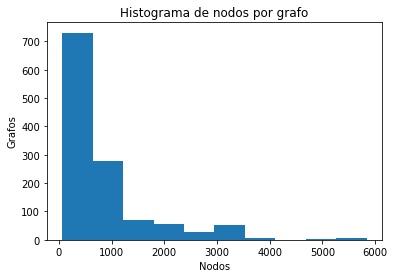

In [7]:
plt.hist([g.number_of_nodes() for g in graphs])
plt.title("Histograma de nodos por grafo")
plt.xlabel("Nodos")
plt.ylabel("Grafos")

Text(0, 0.5, 'Grafos')

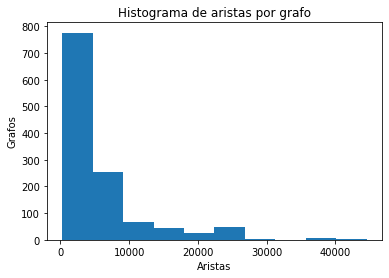

In [8]:
plt.hist([g.number_of_edges() for g in graphs])
plt.title("Histograma de aristas por grafo")
plt.xlabel("Aristas")
plt.ylabel("Grafos")

Text(0, 0.5, 'Grafos')

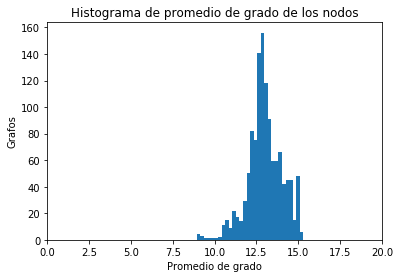

In [12]:
plt.hist([2*g.number_of_edges()/g.number_of_nodes() for g in graphs], bins=30)
plt.title("Histograma de promedio de grado de los nodos")
plt.xlim(0,20)
plt.xlabel("Promedio de grado")
plt.ylabel("Grafos")

In [14]:
ndg = [list(nx.degree_centrality(g).values()) for g in graphs]

(0, 0.2)

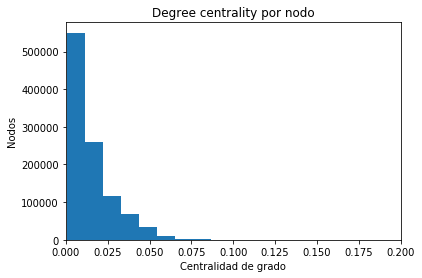

In [25]:
plt.hist([val for g in graphs for val in nx.degree_centrality(g).values()], bins=20)#do avg l8r
plt.title("Degree centrality por nodo")
plt.xlabel("Centralidad de grado")
plt.ylabel("Nodos")
plt.xlim(0,0.20)

(0, 0.2)

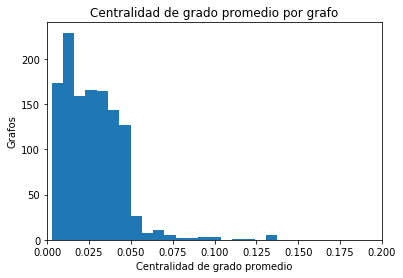

In [24]:
plt.hist([np.mean(list(nx.degree_centrality(g).values())) for g in graphs], bins=20)#do avg l8r
plt.title("Centralidad de grado promedio por grafo")
plt.xlabel("Centralidad de grado promedio")
plt.ylabel("Grafos")
plt.xlim(0, 0.20)

(0, 0.2)

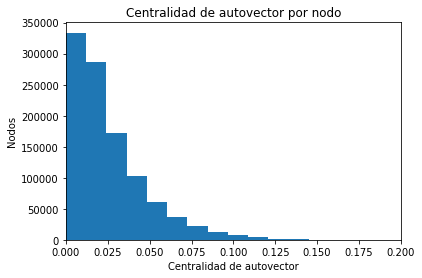

In [29]:
plt.hist([val for g in graphs for val in nx.eigenvector_centrality_numpy(g).values()], bins=20)#do avg l8r
plt.title("Centralidad de autovector por nodo")
plt.xlabel("Centralidad de autovector")
plt.ylabel("Nodos")
plt.xlim(0,0.20)

(0, 0.2)

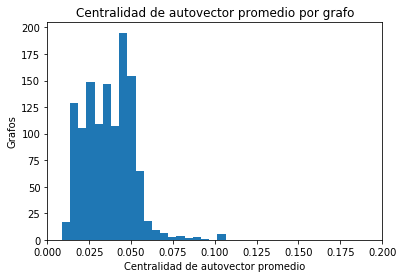

In [30]:
plt.hist([np.mean(list(nx.eigenvector_centrality_numpy(g).values())) for g in graphs], bins=20)#do avg l8r
plt.title("Centralidad de autovector promedio por grafo")
plt.xlabel("Centralidad de autovector promedio")
plt.ylabel("Grafos")
plt.xlim(0, 0.20)

In [31]:
import scipy.sparse as sp
class Laplacian:
    @staticmethod
    def from_adjacency(adj):
        adj = adj + sp.eye(adj.shape[0])
        """Symmetrically normalize adjacency matrix."""
        adj = sp.coo_matrix(adj)
        rowsum = np.array(adj.sum(1))
        d_inv_sqrt = np.power(rowsum, -0.5).flatten()
        d_inv_sqrt[np.isinf(d_inv_sqrt)] = 0.
        d_mat_inv_sqrt = sp.diags(d_inv_sqrt)
        return adj.dot(d_mat_inv_sqrt).transpose().dot(d_mat_inv_sqrt).todense()

In [32]:
eigval = []
for g in graphs: 
    L = Laplacian.from_adjacency(nx.adjacency_matrix(g))
    w,v = np.linalg.eig(L)
    eigval.extend(w)

(-1.1, 1.1)

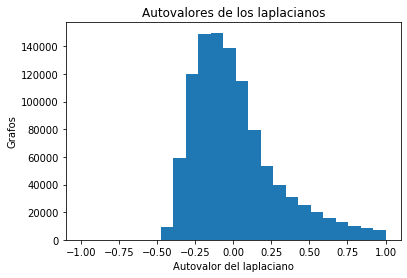

In [37]:
plt.hist(eigval, bins=20)
plt.title("Autovalores de los laplacianos")
plt.xlabel("Autovalor del laplaciano")
plt.ylabel("Grafos")
plt.xlim(-1.1,1.1)

In [ ]:
#RMT => ver si coincide con GUE,GOE,..

In [ ]:
# analizar las mismas variables pero viendo a qué familia pertenecen


In [ ]:
#obtener las familias más importantes de pfam